In [187]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

from imblearn.over_sampling import SMOTE
# Import label encoder 
from sklearn import preprocessing 

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [188]:
#predicting the probability that somebody will experience financial distress in the next two years.

In [189]:
train = pd.read_csv('./cs-training.csv')
test = pd.read_csv('./cs-test.csv')


In [190]:
train.shape

(150000, 12)

In [191]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [192]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [193]:
train.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [194]:
#Deleting rows where Monthly income is null
train = train.loc[~train.MonthlyIncome.isnull()]

In [195]:
train.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [196]:
train['Unnamed: 0'].describe()

count    120269.000000
mean      75026.012514
std       43286.029117
min           1.000000
25%       37678.000000
50%       74969.000000
75%      112494.000000
max      150000.000000
Name: Unnamed: 0, dtype: float64

In [197]:
#we dont need Unnamed: 0, deleting

train = train.drop(['Unnamed: 0'], axis=1)

In [198]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [199]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [200]:
train.filter(like='NumberOfTime').head()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
0,2,0,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,0,0


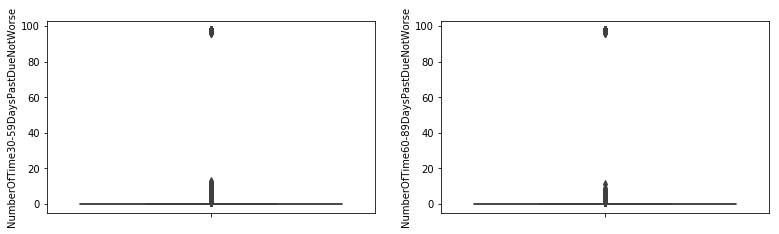

In [201]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y=train['NumberOfTime30-59DaysPastDueNotWorse'])
plt.subplot(3,3,2)
sns.boxplot(y=train['NumberOfTime60-89DaysPastDueNotWorse'])


In [202]:
train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     99970
1     13538
2      3957
3      1525
4       635
5       284
98      144
6       124
7        48
8        23
9        10
96        4
10        3
12        2
13        1
11        1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [203]:
print(train.loc[train['NumberOfTime30-59DaysPastDueNotWorse'] > 50].filter(like='NumberOfTime'))

#Something wrong with these 148 records, all 3 numbers can't be 98, deleting these records

train = train.loc[train['NumberOfTime30-59DaysPastDueNotWorse'] < 50]

        NumberOfTime30-59DaysPastDueNotWorse  NumberOfTimes90DaysLate  NumberOfTime60-89DaysPastDueNotWorse
1733                                      98                       98                                    98
4417                                      98                       98                                    98
4705                                      98                       98                                    98
5073                                      98                       98                                    98
6280                                      98                       98                                    98
7032                                      98                       98                                    98
8173                                      98                       98                                    98
9278                                      98                       98                                    98
9648                        

In [204]:
train.shape

(120121, 11)

In [205]:
train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     113994
1       4807
2        912
3        268
4         85
5         29
6         16
7          6
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [206]:
train['NumberOfTimes90DaysLate'].value_counts()

0     113544
1       4312
2       1234
3        543
4        241
5        103
6         62
7         29
8         16
9         14
10         8
11         4
13         4
15         2
12         2
14         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [207]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


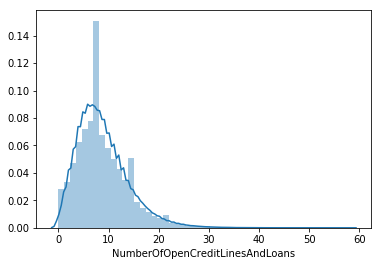

6     10810
7     10734
8     10286
5     10058
9      9448
4      8703
10     8080
11     7029
3      6586
12     5938
13     4843
2      4651
14     3909
15     3147
1      2934
16     2599
17     2036
18     1606
19     1222
20     1020
0      1010
21      748
22      597
23      466
24      359
25      294
26      208
27      174
28      132
29      100
30       76
31       66
32       50
33       38
34       31
35       23
36       16
38       11
40       10
39        9
42        8
37        7
43        6
45        6
48        6
41        4
54        4
49        4
46        3
52        3
51        2
56        2
57        2
50        2
47        2
53        1
44        1
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [208]:
sns.distplot(train['NumberOfOpenCreditLinesAndLoans'])
plt.show()
train.NumberOfOpenCreditLinesAndLoans.value_counts()
#Near normal distribution

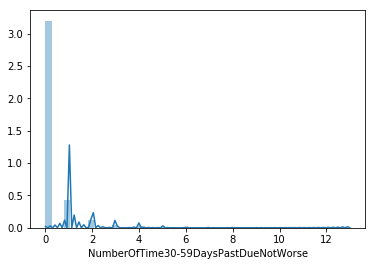

In [209]:
sns.distplot(train['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()

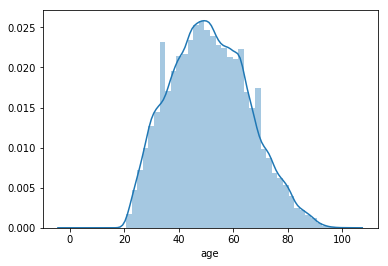

In [210]:
sns.distplot(train['age'])
plt.show()

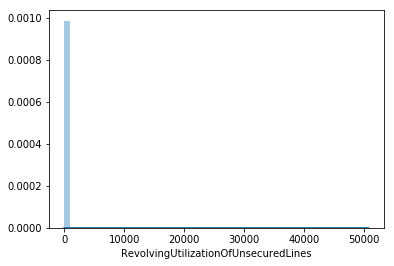

count    120121.000000
mean          5.905910
std         257.198929
min           0.000000
25%           0.034980
50%           0.176697
75%           0.577142
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [211]:
sns.distplot(train['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

train['RevolvingUtilizationOfUnsecuredLines'].describe()

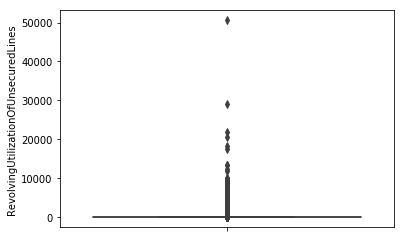

In [212]:
sns.boxplot(y=train['RevolvingUtilizationOfUnsecuredLines'])
#, showfliers=False)

In [213]:
train.loc[train['RevolvingUtilizationOfUnsecuredLines'] > 1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
162,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0
191,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
226,1,1.953488,38,0,0.153500,3556.0,5,0,0,0,2.0
251,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0
293,0,2340.000000,45,0,0.339333,8333.0,7,0,2,0,2.0
319,0,1.002647,38,2,0.472543,3550.0,8,1,0,1,4.0
369,0,1.047496,35,2,0.314566,3871.0,8,0,2,1,3.0
649,0,1.011333,52,0,10.800499,400.0,8,0,1,0,2.0
667,1,1.248751,33,0,0.175120,2700.0,3,2,0,0,0.0
697,1,2066.000000,58,0,0.271121,6000.0,8,1,1,0,1.0


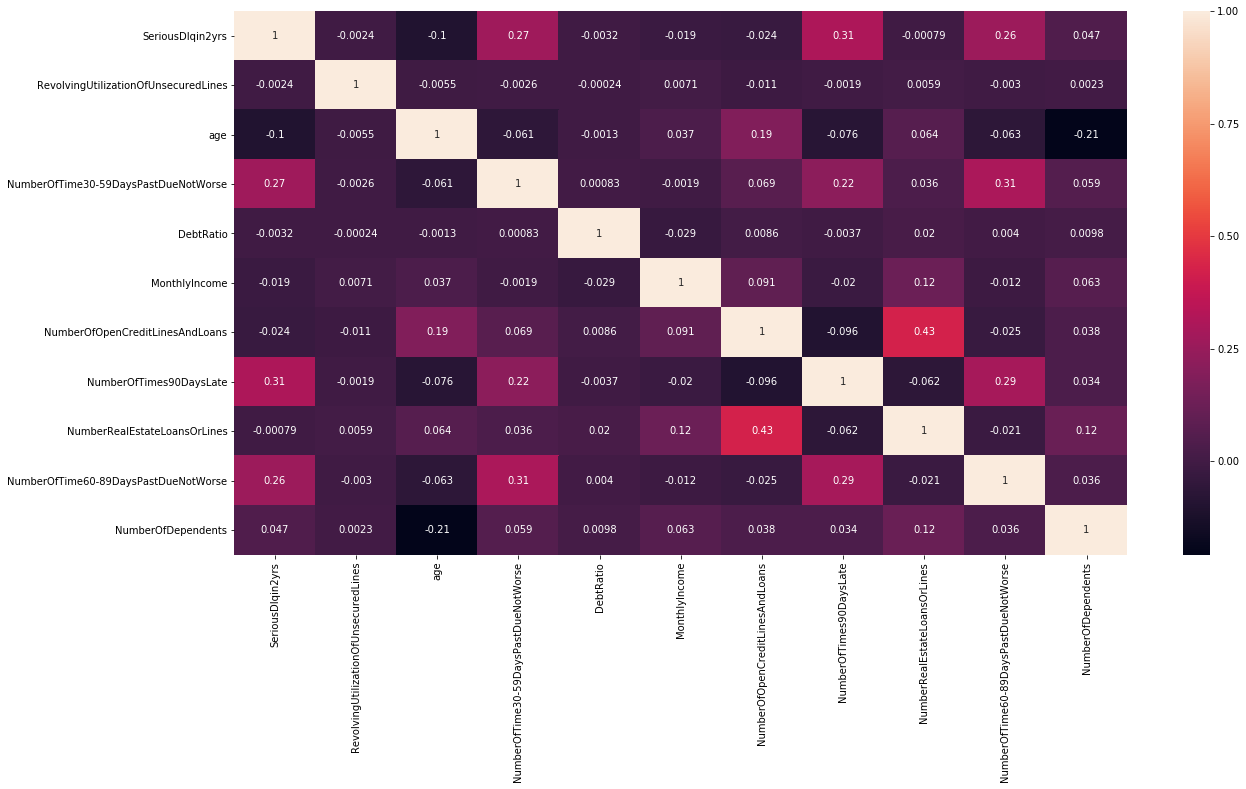

In [214]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(),annot = True)
plt.show()

In [215]:
#Applying Logistics regression

In [216]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120121 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        120121 non-null int64
RevolvingUtilizationOfUnsecuredLines    120121 non-null float64
age                                     120121 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120121 non-null int64
DebtRatio                               120121 non-null float64
MonthlyIncome                           120121 non-null float64
NumberOfOpenCreditLinesAndLoans         120121 non-null int64
NumberOfTimes90DaysLate                 120121 non-null int64
NumberRealEstateLoansOrLines            120121 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120121 non-null int64
NumberOfDependents                      120121 non-null float64
dtypes: float64(4), int64(7)
memory usage: 11.0 MB


In [218]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120121.000000,120121.000000,120121.000000,120121.000000,120121.000000,1.201210e+05,120121.000000,120121.000000,120121.000000,120121.000000,120121.000000
mean,0.068872,5.905910,51.308805,0.261561,26.631541,6.675289e+03,8.769249,0.091508,1.055819,0.067382,0.852182
std,0.253238,257.198929,14.417793,0.719067,424.706830,1.439249e+04,5.166898,0.489229,1.149385,0.336564,1.148539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034980,41.000000,0.000000,0.144104,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.176697,51.000000,0.000000,0.296348,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.577142,61.000000,0.000000,0.482856,8.250000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,13.000000,61106.500000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


0.0     65355
1.0     24358
2.0     18091
3.0      8741
4.0      2656
5.0       688
6.0       150
7.0        49
8.0        22
10.0        5
9.0         4
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

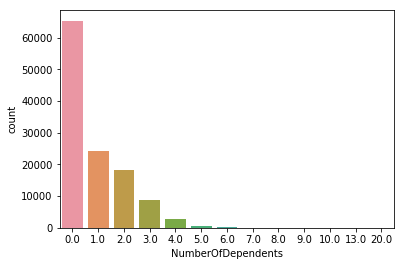

In [219]:
sns.countplot(train['NumberOfDependents'])


train['NumberOfDependents'].value_counts()

0     43282
1     41722
2     26646
3      5367
4      1839
5       585
6       282
7       142
8        79
9        64
10       33
12       17
11       16
13       14
14        7
15        5
16        4
17        3
25        3
19        2
20        2
32        1
18        1
21        1
23        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

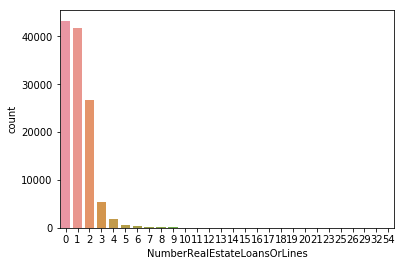

In [220]:

sns.countplot(train['NumberRealEstateLoansOrLines'])
train['NumberRealEstateLoansOrLines'].value_counts()

6     10810
7     10734
8     10286
5     10058
9      9448
4      8703
10     8080
11     7029
3      6586
12     5938
13     4843
2      4651
14     3909
15     3147
1      2934
16     2599
17     2036
18     1606
19     1222
20     1020
0      1010
21      748
22      597
23      466
24      359
25      294
26      208
27      174
28      132
29      100
30       76
31       66
32       50
33       38
34       31
35       23
36       16
38       11
40       10
39        9
42        8
37        7
43        6
45        6
48        6
41        4
54        4
49        4
46        3
52        3
51        2
56        2
57        2
50        2
47        2
53        1
44        1
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

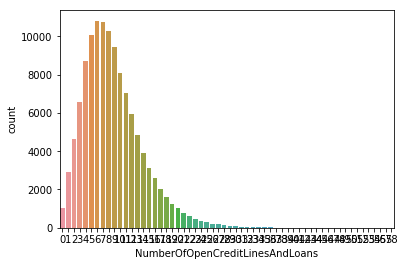

In [221]:
sns.countplot(train['NumberOfOpenCreditLinesAndLoans'])
train['NumberOfOpenCreditLinesAndLoans'].value_counts()

count    1.201210e+05
mean     6.675289e+03
std      1.439249e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64
5400.0
11666.0
48577.46298762838
14392.487662542793


SeriousDlqin2yrs                        328
RevolvingUtilizationOfUnsecuredLines    328
age                                     328
NumberOfTime30-59DaysPastDueNotWorse    328
DebtRatio                               328
MonthlyIncome                           328
NumberOfOpenCreditLinesAndLoans         328
NumberOfTimes90DaysLate                 328
NumberRealEstateLoansOrLines            328
NumberOfTime60-89DaysPastDueNotWorse    328
NumberOfDependents                      328
dtype: int64

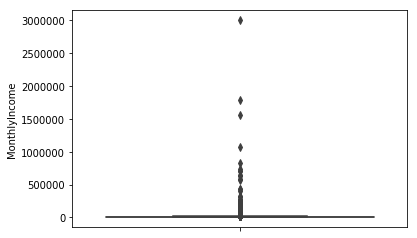

In [222]:
sns.boxplot(y=train['MonthlyIncome'])
print(train.MonthlyIncome.describe())
print(train.MonthlyIncome.quantile(0.5))
print(train.MonthlyIncome.quantile(0.9))
print(train.MonthlyIncome.quantile(0.5) + 3 * train.MonthlyIncome.std())
print(train.MonthlyIncome.std())
train.loc[train.MonthlyIncome > (train.MonthlyIncome.quantile(0.5) + 3 * train.MonthlyIncome.std())].count()

#328 records are having income beyond mean+0.3 SD, not sure whether to be deleted

In [223]:
train.loc[train.MonthlyIncome > (train.MonthlyIncome.quantile(0.5) + 3 * train.MonthlyIncome.std()), 'MonthlyIncome']

4           63588.0
266        208333.0
561         70000.0
1378        60200.0
1537        61000.0
1771        55000.0
2282        55000.0
3152        58249.0
3190        50000.0
3427       110775.0
3430        60000.0
3491        67000.0
4043       203500.0
4301        60000.0
4586        60700.0
4672        52667.0
5009        57000.0
5959        65300.0
6001        96668.0
6053        54166.0
6428        53600.0
6646        58000.0
6658        81000.0
6709        80000.0
6931        57000.0
7107       142000.0
7486        70000.0
7657        51250.0
7785        74872.0
7815        86980.0
8097        76613.0
8405        49500.0
9477        78500.0
9644        73000.0
10209      100000.0
11941       60000.0
12413       50440.0
12722       75000.0
12814       57000.0
12889       71950.0
13291       53800.0
15130      100000.0
15490       88333.0
15909       80176.0
16460       77170.0
17062       50000.0
17373      251608.0
17439      128000.0
17597      235000.0
17912       70833.0


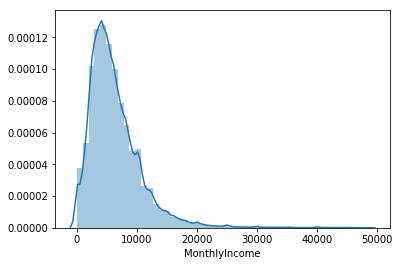

In [224]:
sns.distplot(train.loc[train.MonthlyIncome < (train.MonthlyIncome.quantile(0.5) + 3 * train.MonthlyIncome.std()), 'MonthlyIncome'])
plt.show()

In [225]:
train.DebtRatio.describe()

count    120121.000000
mean         26.631541
std         424.706830
min           0.000000
25%           0.144104
50%           0.296348
75%           0.482856
max       61106.500000
Name: DebtRatio, dtype: float64

In [226]:
train.loc[train.DebtRatio > 1]

train.loc[train.DebtRatio > (train.DebtRatio.quantile(0.5) + 3 * train.DebtRatio.std())].count()

SeriousDlqin2yrs                        846
RevolvingUtilizationOfUnsecuredLines    846
age                                     846
NumberOfTime30-59DaysPastDueNotWorse    846
DebtRatio                               846
MonthlyIncome                           846
NumberOfOpenCreditLinesAndLoans         846
NumberOfTimes90DaysLate                 846
NumberRealEstateLoansOrLines            846
NumberOfTime60-89DaysPastDueNotWorse    846
NumberOfDependents                      846
dtype: int64

In [227]:
train.loc[train.RevolvingUtilizationOfUnsecuredLines > (train.RevolvingUtilizationOfUnsecuredLines.quantile(0.5) + 3 * train.RevolvingUtilizationOfUnsecuredLines.std()),['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio']]

,RevolvingUtilizationOfUnsecuredLines,DebtRatio
293,2340.0,0.339333
697,2066.0,0.271121
1991,1143.0,0.547762
2331,6324.0,0.136673
4278,1982.0,0.144982
4793,3746.0,0.481353
6760,941.0,0.085183
6850,8497.0,0.404930
7637,1577.0,0.479826
8199,9340.0,0.186908


In [228]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [229]:
train.isnull().any().describe()

count        11
unique        1
top       False
freq         11
dtype: object

In [230]:
train.isnull().sum().sum()
#No Null values

0

In [231]:
train.drop_duplicates(inplace=True)

In [232]:
len(train.index)

120025

In [233]:
X = train.drop(['SeriousDlqin2yrs'], axis=1)
y = train['SeriousDlqin2yrs']

#Creating X and y frame

In [234]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [235]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'], dtype='object')

In [236]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [237]:
print(y_train.mean())
print(y_test.mean())
#Mean value is similar, data is separated properly, not skewed

0.06799814323291714
0.07106754054654521


In [238]:
y_train = list(y_train)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                84017
Model:                            GLM   Df Residuals:                    84006
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17210.
Date:                Wed, 21 Aug 2019   Deviance:                       34419.
Time:                        18:17:43   Pearson chi2:                 5.39e+05
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9727      0.017   -170.564      0.000      -3.007      -2.939
RevolvingUtilizationOfUnsecuredLines    -0.0053      0.022     -0.242      0.809      -0.049       0.038
age                                     -0.3530      0.017    -20.253      0.000      -0.387      -0.319
NumberOfTime30-59DaysPastDueNotWorse     0.3906      0.010     37.558      0.000       0.370       0.411
DebtRatio                               -0.0597      0.024     -2.453      0.014      -0.107      -0.012
MonthlyIncome                           -0.5343      0.059     -9.091      0.000      -0.649      -0.419
NumberOfOpenCreditLinesAndLoans          0.0015      0.018      0.085      0.932      -0.034       0.037
NumberOfTimes90DaysLate                  0.4148      0.011     37.091      0.000       0.393       0.437
NumberRealEstateLoansOrLines             0.1291      0.016      7.961      0.000       0.097       0.161
NumberOfTime60-89DaysPastDueNotWorse     0.2531      0.010     24.378      0.000       0.233       0.273
NumberOfDependents                       0.0800      0.014      5.565      0.000       0.052       0.108
========================================================================================================
"""

In [239]:
col = X_train.columns
col = col.drop('RevolvingUtilizationOfUnsecuredLines', 1)
col

Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'], dtype='object')

In [240]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                84017
Model:                            GLM   Df Residuals:                    84007
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17210.
Date:                Wed, 21 Aug 2019   Deviance:                       34419.
Time:                        18:17:43   Pearson chi2:                 5.40e+05
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9727      0.017   -170.566      0.000      -3.007      -2.939
age                                     -0.3530      0.017    -20.252      0.000      -0.387      -0.319
NumberOfTime30-59DaysPastDueNotWorse     0.3906      0.010     37.558      0.000       0.370       0.411
DebtRatio                               -0.0597      0.024     -2.453      0.014      -0.107      -0.012
MonthlyIncome                           -0.5345      0.059     -9.094      0.000      -0.650      -0.419
NumberOfOpenCreditLinesAndLoans          0.0016      0.018      0.089      0.929      -0.034       0.037
NumberOfTimes90DaysLate                  0.4148      0.011     37.093      0.000       0.393       0.437
NumberRealEstateLoansOrLines             0.1291      0.016      7.959      0.000       0.097       0.161
NumberOfTime60-89DaysPastDueNotWorse     0.2531      0.010     24.379      0.000       0.233       0.273
NumberOfDependents                       0.0800      0.014      5.565      0.000       0.052       0.108
========================================================================================================
"""

In [241]:
col = X_train.columns
col = col.drop('NumberOfOpenCreditLinesAndLoans', 1)
col

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'], dtype='object')

In [242]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                84017
Model:                            GLM   Df Residuals:                    84007
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17210.
Date:                Wed, 21 Aug 2019   Deviance:                       34419.
Time:                        18:17:44   Pearson chi2:                 5.36e+05
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9727      0.017   -170.583      0.000      -3.007      -2.939
RevolvingUtilizationOfUnsecuredLines    -0.0054      0.022     -0.243      0.808      -0.049       0.038
age                                     -0.3527      0.017    -20.635      0.000      -0.386      -0.319
NumberOfTime30-59DaysPastDueNotWorse     0.3907      0.010     37.911      0.000       0.371       0.411
DebtRatio                               -0.0597      0.024     -2.452      0.014      -0.107      -0.012
MonthlyIncome                           -0.5337      0.058     -9.150      0.000      -0.648      -0.419
NumberOfTimes90DaysLate                  0.4147      0.011     37.538      0.000       0.393       0.436
NumberRealEstateLoansOrLines             0.1296      0.015      8.599      0.000       0.100       0.159
NumberOfTime60-89DaysPastDueNotWorse     0.2531      0.010     24.384      0.000       0.233       0.273
NumberOfDependents                       0.0800      0.014      5.565      0.000       0.052       0.108
========================================================================================================
"""

In [243]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,NumberOfTime60-89DaysPastDueNotWorse,1.17
2,NumberOfTime30-59DaysPastDueNotWorse,1.12
5,NumberOfTimes90DaysLate,1.12
8,NumberOfDependents,1.07
1,age,1.06
6,NumberRealEstateLoansOrLines,1.04
4,MonthlyIncome,1.02
0,RevolvingUtilizationOfUnsecuredLines,1.00
3,DebtRatio,1.00


In [244]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

54748    0.037817
90444    0.100724
76067    0.997114
19581    0.054352
39065    0.037664
92606    0.047040
3541     0.021571
13108    0.053611
47842    0.123075
34459    0.034532
dtype: float64

In [245]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03781712, 0.10072366, 0.99711449, 0.05435201, 0.03766369,
       0.04704007, 0.021571  , 0.05361115, 0.12307483, 0.03453228])

In [246]:
y_train = pd.DataFrame(y_train)
y_train.rename(columns={0: "SeriousDlqin2yrs"}, inplace=True)
y_train.head()

,SeriousDlqin2yrs
0,0
1,0
2,1
3,0
4,0


In [247]:
y_train_pred_final = pd.DataFrame({'SeriousDlqin2yrs':y_train.SeriousDlqin2yrs, 'SeriousDlqin2yrs_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,SeriousDlqin2yrs,SeriousDlqin2yrs_Prob,CustID
0,0,0.037817,0
1,0,0.100724,1
2,1,0.997114,2
3,0,0.054352,3
4,0,0.037664,4


In [248]:
y_train_pred_final['predicted'] = y_train_pred_final.SeriousDlqin2yrs_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,SeriousDlqin2yrs,SeriousDlqin2yrs_Prob,CustID,predicted
0,0,0.037817,0,0
1,0,0.100724,1,0
2,1,0.997114,2,1
3,0,0.054352,3,0
4,0,0.037664,4,0


In [249]:
confusion = metrics.confusion_matrix(y_train_pred_final.SeriousDlqin2yrs, y_train_pred_final.predicted )
print(confusion)

[[77744   560]
 [ 4917   796]]


In [250]:
print(metrics.accuracy_score(y_train_pred_final.SeriousDlqin2yrs, y_train_pred_final.predicted))

0.9348108120975517


In [251]:
X_test = X_test[col]
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
10607,-0.022059,0.324245,-0.363917,-0.062007,0.126413,-0.187109,0.820684,-0.20029,-0.742434
107231,-0.021532,0.810294,-0.363917,-0.062039,-0.000973,-0.187109,0.820684,-0.20029,0.128085
69048,-0.022970,1.226908,-0.363917,-0.061972,0.224835,-0.187109,0.820684,-0.20029,0.128085
30452,-0.022666,-0.925595,-0.363917,-0.062154,0.230600,-0.187109,0.820684,-0.20029,2.739640
99666,-0.022685,0.185374,-0.363917,-0.062159,0.181979,-0.187109,-0.049296,-0.20029,0.128085


In [252]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
10607,1.0,-0.022059,0.324245,-0.363917,-0.062007,0.126413,-0.187109,0.820684,-0.200290,-0.742434
107231,1.0,-0.021532,0.810294,-0.363917,-0.062039,-0.000973,-0.187109,0.820684,-0.200290,0.128085
69048,1.0,-0.022970,1.226908,-0.363917,-0.061972,0.224835,-0.187109,0.820684,-0.200290,0.128085
30452,1.0,-0.022666,-0.925595,-0.363917,-0.062154,0.230600,-0.187109,0.820684,-0.200290,2.739640
99666,1.0,-0.022685,0.185374,-0.363917,-0.062159,0.181979,-0.187109,-0.049296,-0.200290,0.128085
17660,1.0,-0.020499,0.601988,-0.363917,-0.060819,-0.179410,-0.187109,0.820684,-0.200290,-0.742434
104322,1.0,-0.022282,0.254810,-0.363917,-0.062690,-0.107383,-0.187109,-0.919276,-0.200290,-0.742434
90208,1.0,-0.022854,0.949165,-0.363917,-0.060777,-0.359793,-0.187109,-0.049296,-0.200290,-0.742434
39411,1.0,-0.021765,-0.300675,5.196938,-0.062199,-0.220877,-0.187109,-0.049296,-0.200290,0.128085
102404,1.0,-0.019084,-0.995031,-0.363917,-0.061800,-0.106827,-0.187109,0.820684,-0.200290,0.998603


In [253]:
y_test_pred = res.predict(X_test_sm)

In [254]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
10607,0.033112
107231,0.032047
69048,0.024713
30452,0.062363
99666,0.032360
17660,0.035264
104322,0.030758
90208,0.030831
39411,0.301795
102404,0.066289


In [255]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [256]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [257]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [258]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [259]:
y_pred_final.head()

,SeriousDlqin2yrs,CustID,0
0,0,13226,0.033112
1,0,134076,0.032047
2,0,86286,0.024713
3,0,38219,0.062363
4,0,124552,0.032360


In [260]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'SeriousDlqin2yrs_Prob'})

In [261]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','SeriousDlqin2yrs','SeriousDlqin2yrs_Prob'], axis=1)

In [262]:
y_pred_final.head()

,CustID,SeriousDlqin2yrs,SeriousDlqin2yrs_Prob
0,13226,0,0.033112
1,134076,0,0.032047
2,86286,0,0.024713
3,38219,0,0.062363
4,124552,0,0.032360


In [263]:
y_pred_final['final_predicted'] = y_pred_final.SeriousDlqin2yrs_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [264]:
y_pred_final.head()

,CustID,SeriousDlqin2yrs,SeriousDlqin2yrs_Prob,final_predicted
0,13226,0,0.033112,0
1,134076,0,0.032047,0
2,86286,0,0.024713,0
3,38219,0,0.062363,0
4,124552,0,0.032360,0


In [265]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.SeriousDlqin2yrs, y_pred_final.final_predicted)

0.9328760275494334

In [266]:
#Now check on Kaggle Test data

In [267]:
test.isnull().sum()

#Filling null values with mean values

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [275]:
test.NumberOfDependents.mean(skipna=True)

0.7690463909705998

In [186]:
test.MonthlyIncome.fillna(test.MonthlyIncome.mean(), inplace=True)
test.NumberOfDependents.fillna(test.NumberOfDependents.mode(), inplace=True)
test.isnull().sum()
test.NumberOfDependents.mode()

0    0.0
dtype: float64

In [174]:
#KJ

X_test1 = test[col]

X_test = pd.DataFrame(scale(X_test1))

X_test.columns = col


X_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.022556,-0.636376,-0.099983,-0.210891,-0.035329,-0.0657,-0.912475,-0.060023,-0.676517
1,-0.024709,0.310870,-0.099983,-0.210677,0.069920,-0.0657,2.690325,-0.060023,1.082850
2,-0.026850,0.446191,-0.099983,-0.210578,-0.054201,-0.0657,-0.011775,-0.060023,1.082850
3,-0.025641,-0.974678,0.120356,-0.210432,-0.111796,-0.0657,0.888925,-0.060023,-0.676517
4,-0.021972,-1.718943,-0.099983,-0.210987,-0.091456,-0.0657,-0.912475,-0.060023,0.203166


In [175]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,-0.022556,-0.636376,-0.099983,-0.210891,-3.532890e-02,-0.065700,-0.912475,-0.060023,-0.676517
1,1.0,-0.024709,0.310870,-0.099983,-0.210677,6.992045e-02,-0.065700,2.690325,-0.060023,1.082850
2,1.0,-0.026850,0.446191,-0.099983,-0.210578,-5.420098e-02,-0.065700,-0.011775,-0.060023,1.082850
3,1.0,-0.025641,-0.974678,0.120356,-0.210432,-1.117960e-01,-0.065700,0.888925,-0.060023,-0.676517
4,1.0,-0.021972,-1.718943,-0.099983,-0.210987,-9.145576e-02,-0.065700,-0.912475,-0.060023,0.203166
5,1.0,-0.024471,0.716833,-0.099983,-0.210790,-8.304438e-02,-0.065700,-0.912475,-0.060023,0.203166
6,1.0,-0.024074,-0.162753,-0.099983,0.430926,-2.096739e-01,-0.065700,-0.912475,-0.060023,1.962533
7,1.0,-0.026835,1.799400,0.120356,-0.210773,-1.087067e-01,-0.065700,-0.011775,-0.060023,0.203166
8,1.0,-0.027001,1.055135,-0.099983,1.028751,5.563715e-17,-0.065700,-0.011775,-0.060023,-0.676517
9,1.0,-0.021972,-1.989585,21.493220,-0.210999,-2.096739e-01,21.635706,-0.912475,21.700562,-0.676517


In [176]:
y_test_pred = res.predict(X_test_sm)

In [177]:
y_test_pred.head()

0    0.048775
1    0.059911
2    0.043739
3    0.076501
4    0.076677
dtype: float64

In [178]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [179]:
y_pred_1

,0
0,0.048775
1,0.059911
2,0.043739
3,0.076501
4,0.076677
5,0.033831
6,0.053569
7,0.028825
8,0.028107
9,1.000000


In [180]:
submission = pd.DataFrame({"Id": range(1,101504),"Probability": y_pred_1[0]})
submission.head()

,Id,Probability
0,1,0.048775
1,2,0.059911
2,3,0.043739
3,4,0.076501
4,5,0.076677


In [181]:
submission.shape

(101503, 2)

In [182]:
submission.to_csv('./submission1.csv',index=False)

#Kaggle score 0.72 21-Aug-19

In [303]:
y_pred_1[0].describe()

count    81400.000000
mean         0.000123
std          0.011083
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 0, dtype: float64

In [304]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [305]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [156]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

,SeriousDlqin2yrs,CustID,0
0,0.0,107829.0,0.0
1,0.0,56919.0,0.0
2,0.0,109850.0,0.0
3,0.0,22491.0,0.0
4,0.0,138706.0,0.0


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'SeriousDlqin2yrs_Prob'})

In [160]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','SeriousDlqin2yrs','SeriousDlqin2yrs_Prob'], axis=1)

In [161]:
y_pred_final.head()

,CustID,SeriousDlqin2yrs,SeriousDlqin2yrs_Prob
0,107829.0,0.0,0.0
1,56919.0,0.0,0.0
2,109850.0,0.0,0.0
3,22491.0,0.0,0.0
4,138706.0,0.0,0.0


In [162]:
y_pred_final['final_predicted'] = y_pred_final.SeriousDlqin2yrs_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [163]:
y_pred_final.head()

,CustID,SeriousDlqin2yrs,SeriousDlqin2yrs_Prob,final_predicted
0,107829.0,0.0,0.0,0
1,56919.0,0.0,0.0,0
2,109850.0,0.0,0.0,0
3,22491.0,0.0,0.0,0
4,138706.0,0.0,0.0,0


In [164]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.SeriousDlqin2yrs, y_pred_final.final_predicted)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [133]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [134]:
test_1 = test[col]

In [135]:
test_1.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,0,0,0,1.0


In [18]:
#Starting up with Linear SVM model

In [19]:
model = SVC(C = 1)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [20]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[3161,    0,   11,    6,    7,   11,   27,   12,   19,    1],
       [   0, 3691,   16,   11,    4,    5,    7,   15,   11,    4],
       [  15,   17, 3113,   33,   30,    6,   24,   82,   43,    6],
       [   6,   10,   67, 3144,    3,   88,    5,   89,   51,   20],
       [   1,    9,   29,    2, 3083,   10,   14,   29,   10,   65],
       [  10,   21,   18,   82,   19, 2771,   43,   35,   30,   28],
       [  20,    7,    6,    0,   16,   32, 3195,   18,   16,    0],
       [   9,   22,   27,    5,   32,    5,    0, 3317,    3,  106],
       [  11,   37,   30,   58,   20,   50,   16,   32, 2981,   36],
       [  15,    7,   15,   38,   82,    7,    0,  110,   21, 3018]],
      dtype=int64)

In [21]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average='micro' ))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred, average='micro'))

accuracy 0.9367261904761904
precision 0.9367261904761904
recall 0.9367261904761904


In [22]:
#Trying out with K fold Cross Validation
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [23]:
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

# K Cross Cross validation with 5 folds

In [24]:
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))
#All the different folds are having >92% accuracy

[0.9327381  0.93333333 0.92678571 0.94107143 0.9327381 ]
mean accuracy = 0.9333333333333332


In [25]:
#Using Grid search to find optimum hyperparameter C

# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True,
                       n_jobs=-1) 

#GridSearchCV is running with 5 differnt values and 5 folds thus 25 fits

In [26]:
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [27]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,218.893742,17.467778,48.433109,6.127855,0.1,{'C': 0.1},0.873810,0.866667,0.870833,0.876786,...,0.868571,0.007673,5,0.883929,0.884375,0.887202,0.884077,0.885714,0.885060,0.001244
1,108.306829,5.883715,30.911999,3.608398,1,{'C': 1},0.932738,0.933333,0.926786,0.941071,...,0.933333,0.004549,4,0.976935,0.977827,0.979018,0.978423,0.979613,0.978363,0.000930
2,94.472797,3.454484,26.961872,1.310659,10,{'C': 10},0.944643,0.938095,0.939286,0.942857,...,0.940833,0.002486,1,0.999554,0.999851,0.999554,0.999554,0.999256,0.999554,0.000188
3,95.052660,4.049962,26.835293,2.444651,100,{'C': 100},0.945238,0.937500,0.938690,0.941667,...,0.940357,0.002802,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,89.816476,5.147147,24.092551,0.579383,1000,{'C': 1000},0.945238,0.937500,0.938690,0.941667,...,0.940357,0.002802,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


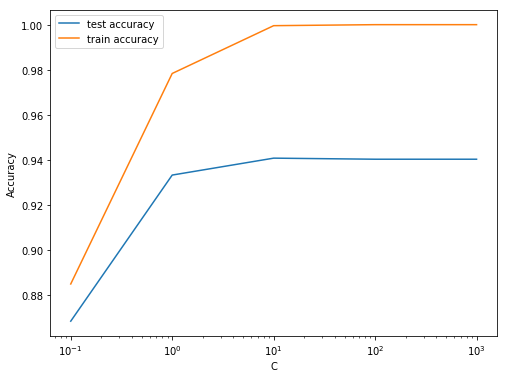

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

#Test results are best at C=10

In [29]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

#Linear model is giving us 94.08% accuracy with C=10

 The highest test accuracy is 0.9408333333333333 at C = 10


In [30]:
##### Building Non-Linear Model - checking non-Linear model now to find which model works better Linear or non-Linear

In [31]:
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
# confusion matrix
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[3161,    0,   11,    6,    7,   11,   27,   12,   19,    1],
       [   0, 3691,   16,   11,    4,    5,    7,   15,   11,    4],
       [  15,   17, 3113,   33,   30,    6,   24,   82,   43,    6],
       [   6,   10,   67, 3144,    3,   88,    5,   89,   51,   20],
       [   1,    9,   29,    2, 3083,   10,   14,   29,   10,   65],
       [  10,   21,   18,   82,   19, 2771,   43,   35,   30,   28],
       [  20,    7,    6,    0,   16,   32, 3195,   18,   16,    0],
       [   9,   22,   27,    5,   32,    5,    0, 3317,    3,  106],
       [  11,   37,   30,   58,   20,   50,   16,   32, 2981,   36],
       [  15,    7,   15,   38,   82,    7,    0,  110,   21, 3018]],
      dtype=int64)

In [33]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred, average='micro'))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred, average='micro'))

#Non linear model with rbf kernel and C=1 gives accuracy of 93.67%

accuracy 0.9367261904761904
precision 0.9367261904761904
recall 0.9367261904761904


In [34]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
#Applying GridSearchCV to find the optimum values of Hyperparameters C and gamma

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
model_cv.fit(X_train, y_train)                  

#GridSearchCV is now being done with 3 gamma values, 4 C values and 5 folds --> 60 fits

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 24.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

#More understanding on 10 class classification problem

If you check the SVM.SVC documentation then decision_function_shape by default is ovr which is one Vs Rest, which says that if there are multiple classes then classes are evaluated as one class Vs all other classes. 

decision_function_shape : ‘ovo’, ‘ovr’, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.

Changed in version 0.19: decision_function_shape is ‘ovr’ by default.

In [35]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,231.937579,14.786311,26.869935,1.708651,1,0.01,"{'C': 1, 'gamma': 0.01}",0.749405,0.751190,0.742262,...,0.744405,0.017106,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,56.070913,3.536274,16.053553,1.455757,1,0.001,"{'C': 1, 'gamma': 0.001}",0.934524,0.932143,0.924405,...,0.932381,0.005742,4,0.971429,0.972321,0.972917,0.971577,0.973214,0.972292,0.000707
2,75.456545,6.719533,18.415511,2.022989,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.898810,0.905952,0.898810,...,0.900595,0.003194,8,0.913988,0.916071,0.919345,0.915030,0.916964,0.916280,0.001829
3,258.326635,28.492987,29.034281,1.619292,10,0.01,"{'C': 10, 'gamma': 0.01}",0.771429,0.765476,0.761310,...,0.764286,0.015735,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,41.310211,1.758964,13.420271,0.668309,10,0.001,"{'C': 10, 'gamma': 0.001}",0.946429,0.939286,0.938095,...,0.941190,0.003417,1,0.999107,0.998661,0.998363,0.998958,0.998661,0.998750,0.000259


In [36]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

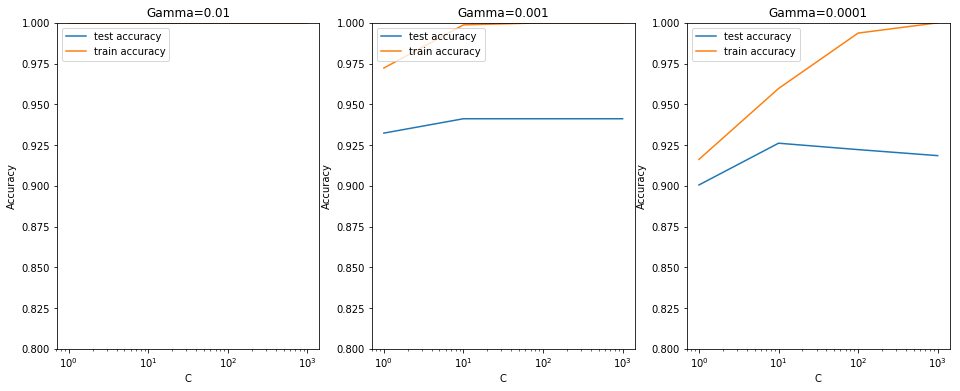

In [37]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

#Gamma=0.001 and C=10 gives best result

In [38]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9411904761904762 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [39]:
#Building the final model
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.001, "kernel":"rbf"}

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred, average='micro'))
print("precision - all classes :", metrics.precision_score(y_test, y_pred, average=None))

print("sensitivity/recall", metrics.recall_score(y_test, y_pred, average='micro'))
print("sensitivity/recall - all classes:", metrics.recall_score(y_test, y_pred, average=None))

#Model is giving 94.65% accuracy

[[3176    0   16    4   10    7   27    1   13    1]
 [   1 3702   14   10    2    1   10   10    8    6]
 [  18   15 3162   23   24    5   58   26   30    8]
 [   9    2   57 3202    5   63   26   50   44   25]
 [   1   11   24    3 3105    8   16   21    7   56]
 [   9   13   16   66    8 2848   51    5   23   18]
 [  27    4   11    0   18   23 3215    0   12    0]
 [   5   18   31    5   36    6   21 3333    1   70]
 [  12   33   32   51   24   56   30   19 2982   32]
 [  13    7   11   26   61    8   19   74   14 3080]] 

accuracy 0.946577380952381
precision 0.946577380952381
precision - all classes : [0.97095689 0.97293035 0.93716657 0.94454277 0.9429092  0.9414876
 0.92571264 0.94179147 0.95149968 0.93446602]
sensitivity/recall 0.946577380952381
sensitivity/recall - all classes: [0.97572965 0.98352816 0.93855744 0.91932242 0.95479705 0.93163232
 0.97129909 0.94526375 0.91164781 0.92967099]


In [40]:

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.98      0.97      3255
     class 1       0.97      0.98      0.98      3764
     class 2       0.94      0.94      0.94      3369
     class 3       0.94      0.92      0.93      3483
     class 4       0.94      0.95      0.95      3252
     class 5       0.94      0.93      0.94      3057
     class 6       0.93      0.97      0.95      3310
     class 7       0.94      0.95      0.94      3526
     class 8       0.95      0.91      0.93      3271
     class 9       0.93      0.93      0.93      3313

   micro avg       0.95      0.95      0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



In [41]:
df = pd.DataFrame(classification_report(y_test, y_pred, target_names=target_names,output_dict=True)).transpose()
df
#Precision & Recall are above 90% for all 10 classes

,f1-score,precision,recall,support
class 0,0.973337,0.970957,0.975730,3255.0
class 1,0.978201,0.972930,0.983528,3764.0
class 2,0.937861,0.937167,0.938557,3369.0
class 3,0.931762,0.944543,0.919322,3483.0
class 4,0.948816,0.942909,0.954797,3252.0
class 5,0.936534,0.941488,0.931632,3057.0
class 6,0.947958,0.925713,0.971299,3310.0
class 7,0.943524,0.941791,0.945264,3526.0
class 8,0.931148,0.951500,0.911648,3271.0
class 9,0.932062,0.934466,0.929671,3313.0


In [42]:
#Now running on Actual test.csv for Kaggle submission
test.head()
test.shape
model

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
#Building the final model
# specify optimal hyperparameters
test = scale(test)
y_pred = model.predict(test)

C:\Users\Kavita Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
y_pred.shape
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [45]:
submission = pd.DataFrame({"ImageId": range(1,28001),"Label": y_pred})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2


In [46]:
submission.shape

(28000, 2)

In [47]:
submission.to_csv('./submission.csv',index=False)

#Kaggle score with this submission - 0.946 Date 17-July-19

28000


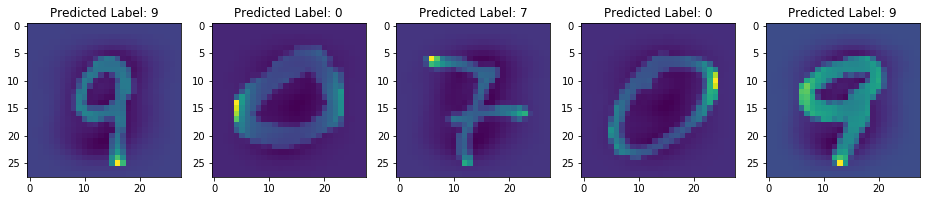

In [48]:
# visualizing Final Model on Test Dataset

a = np.random.randint(1,y_pred.shape[0]+1,5)
print(y_pred.shape[0])
plt.figure(figsize=(16,4))
for k,v in enumerate(a):
    #print(k,v)
    plt.subplot(150+k+1)
    _2d = test[v].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[v]}')
    plt.imshow(_2d)
plt.show()

- Used 20% of the Train data for model training, 80% was used for Testing the model
- SVM non linear kernel is selected - "C": 10, "gamma": 0.001, "kernel":"rbf" are the final hyperparamaters for the model
- Kaggle submission was done and it scored 0.946